Importing the Required Libraries

In [440]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Reading the data

In [441]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#DATA VISUALIZATION

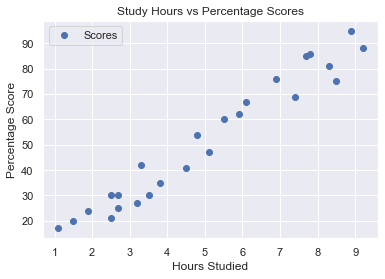

In [442]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Linear Regression Model

In [443]:
#Splitting training and testing data
x=data.iloc[:,:-1].values #Attribute
y = data.iloc[:, 1].values    #Labels
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.8,test_size=0.2,random_state=24)

Training the model

In [444]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_train)

Testing the Algorithm

In [445]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training complete.")
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Training complete.
Coefficient - [9.95819213]
Intercept -  1.8707455429497628


Plotting the regression line

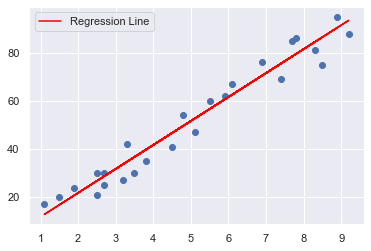

In [446]:
line = regressor.coef_*x+regressor.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red', label='Regression Line')
plt.legend()
plt.show()

Make predictions

In [447]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test)
# Comparing Actual vs Predicted (Predicting the scores)
df= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

[[2.5]
 [9.2]
 [3.8]
 [1.5]
 [2.7]]


,Actual,Predicted
0,30,26.766226
1,88,93.486113
2,35,39.711876
3,20,16.808034
4,25,28.757864


Accuracy of scores for training and test set

In [448]:
print('Test Score:',regressor.score(x_test, y_test))
print('Training Score:',regressor.score(x_train, y_train))

Test Score: 0.9714834608072798
Training Score: 0.943706685921912


Testing with some new data

In [449]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
given_pred = regressor.predict(test)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {given_pred[0]}")

#print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

No of Hours = 9.25
Predicted Score = 93.98402276410785


Evaluating the model

In [451]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred)) #goodness of the fit (Accuracy of model)
print('Accuracy of model:',metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error: 4.076318697509944
Mean Squared Error: 17.413339492642717
Root Mean Squared Error: 4.1729293658822835
R-2: 0.9714834608072798
Accuracy of model: 97.14834608072798
